#IS 470 Lab 8: Clustering

---
You have been given a data file by the San Francisco Bay Area Rapid Transit (BART), which identifies a set of demographics for residents in a local area. We will use this file to determine residents segmentations so that we can use it to develop marketing plans accordingly.<br>
<br>
VARIABLE DESCRIPTIONS:<br>
<br>
Age:  

            1.   14 thru 17
            2.   18 thru 24
            3.   25 thru 34
            4.   35 thru 44
            5.   45 thru 54
            6.   55 thru 64
            7.   65 and Over

DistToWork: Distance to work in miles<br>
DualInc: Is dual income household or not<br>
Education:  
            
            1. Grade 8 or less<br>
            2. Grades 9 to 11<br>
            3. Graduated high school<br>
            4. 1 to 3 years of college<br>
            5. College graduate<br>
            6. Grad Study<br>
Gender:	M or F<br>
Income: 
        
            1. Less than $10,000<br>
            2. $10,000 to $14,999<br>
            3. $15,000 to $19,999<br>
            4. $20,000 to $24,999<br>
            5. $25,000 to $29,999<br>
            6. $30,000 to $39,999<br>
            7. $40,000 to $49,999<br>
            8. $50,000 to $74,999<br>
            9. $75,000 or more<br>
Language:	Language spoken at home<br>
NbrInHouseHold:	Number in household<br>
NbrInHouseholdUnder18:	Number in household under 18 years old<br>
OwnRent:	Own, rent, or live with parents<br>
YrsInArea:	Years lived in bay area<br>
Rider:	No, Non-rider; Yes, Rider<br>

###1. Upload and clean data

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BartRider.csv to BartRider.csv
User uploaded file "BartRider.csv" with length 199121 bytes


In [ ]:
# Import libraries
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [ ]:
# Read data
BartRider = pd.read_csv("BartRider.csv")
BartRider

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,Y,4,M,5,English,2,0,Own,5,Yes
5489,4,9,Y,3,F,6,English,3,1,Rent,2,Yes
5490,2,7,N,4,M,2,English,1,1,Rent,1,Yes
5491,3,7,Y,3,F,9,English,2,0,Own,5,No


In [ ]:
# Show the head rows of a data frame
BartRider.head()

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes


In [ ]:
# Examine variable type
BartRider.dtypes

Age                       int64
DistToWork                int64
DualInc                  object
Education                 int64
Gender                   object
Income                    int64
Language                 object
NbrInHouseHold            int64
NbrInHouseholdUnder18     int64
OwnRent                  object
YrsInArea                 int64
Rider                    object
dtype: object

In [ ]:
# Change categorical variables to "category"
BartRider['DualInc'] = BartRider['DualInc'].astype('category')
BartRider['Gender'] = BartRider['Gender'].astype('category')
BartRider['Language'] = BartRider['Language'].astype('category')
BartRider['OwnRent'] = BartRider['OwnRent'].astype('category')
BartRider['Rider'] = BartRider['Rider'].astype('category')

In [ ]:
# Examine variable type
BartRider.dtypes

Age                         int64
DistToWork                  int64
DualInc                  category
Education                   int64
Gender                   category
Income                      int64
Language                 category
NbrInHouseHold              int64
NbrInHouseholdUnder18       int64
OwnRent                  category
YrsInArea                   int64
Rider                    category
dtype: object

###2. Prepare data set for clustering

In [ ]:
# Create dummy variables
BartRider = pd.get_dummies(BartRider, columns=['DualInc','Gender','Language','OwnRent','Rider'], drop_first=True)
BartRider

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent,Rider_Yes
0,7,14,3,3,1,0,5,0,0,0,0,0,1,1
1,7,10,5,8,2,0,5,0,1,0,0,0,0,0
2,3,9,3,1,1,0,5,0,1,0,0,0,1,1
3,1,13,2,1,5,3,5,0,1,0,0,1,0,1
4,3,14,5,2,3,1,5,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,4,5,2,0,5,1,1,0,0,0,0,1
5489,4,9,3,6,3,1,2,1,0,0,0,0,1,1
5490,2,7,4,2,1,1,1,0,1,0,0,0,1,1
5491,3,7,3,9,2,0,5,1,0,0,0,0,0,0


In [ ]:
# Apply minmax normalization
min_max_scaler = preprocessing.MinMaxScaler()
BartRider_normalized = pd.DataFrame(min_max_scaler.fit_transform(BartRider))
BartRider_normalized.columns = BartRider.columns
BartRider_normalized

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent,Rider_Yes
0,1.000000,0.647059,0.4,0.250,0.000,0.000000,1.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.000000,0.411765,0.8,0.875,0.125,0.000000,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.352941,0.4,0.000,0.000,0.000000,1.00,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.000000,0.588235,0.2,0.000,0.500,0.333333,1.00,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.333333,0.647059,0.8,0.125,0.250,0.111111,1.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,0.333333,0.470588,0.6,0.500,0.125,0.000000,1.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0
5489,0.500000,0.352941,0.4,0.625,0.250,0.111111,0.25,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5490,0.166667,0.235294,0.6,0.125,0.000,0.111111,0.00,0.0,1.0,0.0,0.0,0.0,1.0,1.0
5491,0.333333,0.235294,0.4,1.000,0.125,0.000000,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Clustering model

In [ ]:
# Build a clustering model with n_clusters = 2. Set random_state=0.
model1 = KMeans(n_clusters=2, random_state=0)
model1.fit(BartRider_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# Generate the cluster labels
model1.labels_

array([1, 0, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
# Show cluster size
Counter(model1.labels_)

Counter({0: 3159, 1: 2334})

In [ ]:
# Show cluster centroids
pd.DataFrame({'cluster 1':BartRider[model1.labels_==0].mean(axis=0), 'cluster 2':BartRider[model1.labels_==1].mean(axis=0)})

,cluster 1,cluster 2
Age,4.163976,2.562982
DistToWork,11.533713,11.413882
Education,4.361823,3.209940
Income,6.870529,2.846187
NbrInHouseHold,2.646724,3.255356
NbrInHouseholdUnder18,0.566635,0.897601
YrsInArea,4.330801,4.239931
DualInc_Y,0.377018,0.063839
Gender_M,0.475783,0.442159
Language_Other,0.014562,0.050557


Q1. What is the percentage of BART riders for cluster 1 and 2?<br>
Cluster 1 : 2.37%<br>
Cluster 2 : 97.64%

Q2. Use the attributes information of cluster centers to understand the profile of residents. Interpret each cluster based on your understanding.<br>
I beleive Cluster 1 could be young working professionals because they have high education, high income, and they own their own homes

I beleive Cluster 2 could be students because they are younger, lower education level, low income, and live with their parents or rent a place, small percentage own a home


In [ ]:
# Build a clustering model with n_clusters = 3
model2 = KMeans(n_clusters=3, random_state=0)
model2.fit(BartRider_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
# Generate the cluster labels
model2.labels_

array([1, 2, 1, ..., 1, 2, 0], dtype=int32)

In [ ]:
# Show cluster size
Counter(model2.labels_)

Counter({0: 1486, 1: 1688, 2: 2319})

In [ ]:
# Show cluster centroids
pd.DataFrame({'cluster 1':BartRider[model2.labels_==0].mean(axis=0), 'cluster 2':BartRider[model2.labels_==1].mean(axis=0), 'cluster 3':BartRider[model2.labels_==2].mean(axis=0)})

,cluster 1,cluster 2,cluster 3
Age,1.875505,3.234005,4.695990
DistToWork,11.423957,11.498815,11.508840
Education,2.765141,4.052725,4.450625
Income,2.881561,4.405213,7.170763
NbrInHouseHold,3.936070,2.164100,2.784390
NbrInHouseholdUnder18,1.246972,0.338270,0.630013
YrsInArea,4.429341,3.777844,4.578698
DualInc_Y,0.002692,0.152844,0.464856
Gender_M,0.421938,0.563389,0.412678
Language_Other,0.055182,0.026659,0.015955


Q3. Assign a meaningful name to each cluster based on the representative profile of residents in each cluster. Explain the reasons for the name you choose.<br>
<br>
Cluster 1 is probably students since they are younger, lower education and lower income level, also live with parents, and majority are riders

Cluster 2 is probably working professionals, they have medium income, medium eduation level, medium riders, medium age, and most rent a apartment or house

Cluster 3 is probably Managers/Professional Adults, high value for : age, income, years in area, dual indome. They also have a high percentage to own a house but also have the low percentage of riders




Q4. Based on the cluster size and centroids, which n_clusters (n_clusters=2 or n_clusters=3) you will use, and why?<br>
<br>
3 clusters because there is a bigger difference between the different cluster variables. Such as age variable the lowest is 1.8 highest 4.96
Two clusters are closer in their age gaps : 4.1 and 2.56. Therefore, giving you less detailed information to work with.


Q5. If we segment residents into 3 clusters, what marketing plans you can use to target each cluster?<br>
1) Student discount for the students<br>
2) Social media marketing for the young working professionals<br>
3) Speak to the advantages of bart for managers. How time efficient it is so they can spend more time with family. Also, how Bart's reduce emissions and are cheaper financially<br>


## 4. Elbow test to determine optimal number of clusters

Text(0.5, 1.0, 'Elbow Test')

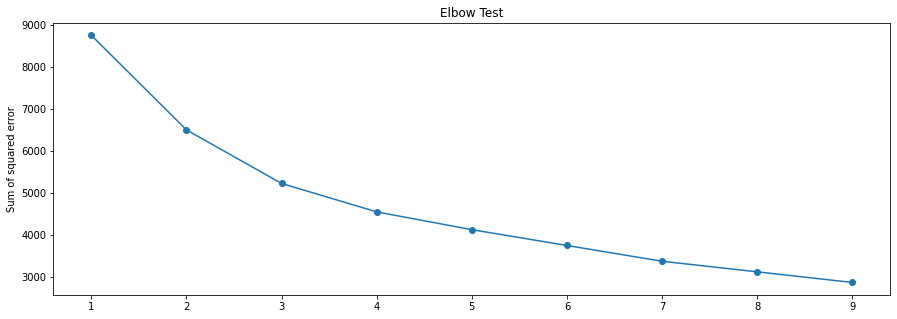

In [ ]:
Sum_of_squared_error = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(BartRider_normalized)
    Sum_of_squared_error.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.scatter(range(1, 10), Sum_of_squared_error)
plt.plot(range(1, 10), Sum_of_squared_error)
plt.ylabel('Sum of squared error')
plt.title('Elbow Test')

Q5. What is the optimal cluster number?<br>
K = 3 is the optimal cluster number

***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the lab8.ipynb file***
2.   ***Upload the lab8.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [ ]:
!jupyter nbconvert --to html IS470_lab8.ipynb

[NbConvertApp] Converting notebook IS470_lab8.ipynb to html
[NbConvertApp] Writing 345604 bytes to IS470_lab8.html
